<font color='lightgreen'>




# 2. Data Integration

## 2.1  Libraries Import <a class="anchor" id="2.1"></a>

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0b027e5c413ec069f7db2f079d039aa0f3b1ae81d6baca45316c3723402ef2b6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport


In [ ]:
#Importing data manipulation and analysis
import pandas as pd
import numpy as np
import math
from math import ceil
import warnings
warnings.filterwarnings("ignore")
#Importing Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from tqdm.notebook import tqdm, trange
tqdm.pandas(desc="Progress")
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans
#Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## 2.2 Data Import <a class="anchor" id="2.2"></a>

Import dataset

In [ ]:
excel_file_path = "/content/last.xlsx"
data = pd.read_excel(excel_file_path)

In [ ]:
data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,placeLabel,placeLabelE,heritage,longitude,latitude,UNESCO,image,...,wiki_links,Nbwikis,LgWiki,LgWrdContent,NbPhotos,TotalWords,search_url,google_maps_url,Average Rating,Total number of ratings
0,0,0.0,308,Madaure,Madauros,0,7.902356,36.077830,0,http://commons.wikimedia.org/wiki/Special:File...,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/search/Madaure,https://www.google.com/maps/place/Madaure/@36....,4.5,20
1,1,1.0,571,Madaure,Madauros,0,7.902356,36.077830,0,http://commons.wikimedia.org/wiki/Special:File...,...,https://ar.wikipedia.org/wiki/%D9%85%D8%A7%D8%...,10.0,https://ca.wikipedia.org/wiki/Madaure,176.0,2.0,6977.0,https://www.google.com/maps/search/Madaure,https://www.google.com/maps/place/Madaure/@36....,4.5,20
2,2,2.0,326,Golf Flamingo,Golf course Flamingo,0,10.800041,35.745504,0,http://commons.wikimedia.org/wiki/Special:File...,...,https://ar.wikipedia.org/wiki/%D8%BA%D9%88%D9%...,3.0,https://fr.wikipedia.org/wiki/Golf_Flamingo,61.0,3.0,35070.0,https://www.google.com/maps/search/Golf+Flamingo,https://www.google.com/maps/place/Flamingo+Gol...,4.0,102
3,3,3.0,331,MausolÃ©e Sidi Abid el Ghariani,Zawiya of Sidi Abid el Ghariani,1,10.101600,35.675100,1,http://commons.wikimedia.org/wiki/Special:File...,...,https://ar.wikipedia.org/wiki/%D8%B6%D8%B1%D9%...,3.0,https://ar.wikipedia.org/wiki/%D8%B6%D8%B1%D9%...,58.0,3.0,18574.0,https://www.google.com/maps/search/MausolÃ©e+S...,https://www.google.com/maps/place/Mausol%C3%A9...,4.5,21
4,4,4.0,335,Borj Ennar,Borj Ennar,0,10.764337,34.735462,0,http://commons.wikimedia.org/wiki/Special:File...,...,https://ar.wikipedia.org/wiki/%D8%A8%D8%B1%D8%...,5.0,https://ar.wikipedia.org/wiki/%D8%A8%D8%B1%D8%...,61.0,9.0,13247.0,https://www.google.com/maps/search/Borj+Ennar,https://www.google.com/maps/place/Borj+Ennar/@...,4.1,9


In [ ]:
len(data)

314

In [ ]:
data.shape

(314, 21)

<a class="anchor" id="third-bullet">     

# 3. Data exploration

##  3.1. Data fields <a class="anchor" id="3.1"></a>

##  3.2. Profiler Report <a class="anchor" id="3.1"></a>

In [ ]:
# Generate the profile report
profile = ProfileReport(data, title="Pandas Profiling Report")
# Display the report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: Couldn't find space to draw. Either the Canvas size is too small or too much of the image is masked out.

<Figure size 600x400 with 0 Axes>

## 3.3. Exploratory Data Analysis <a class="anchor" id="3.2"></a>

In [ ]:
# Print how many observations and features are in the dataset
print('There are {} observations and {} features in the dataset'.format(data.shape[0], data.shape[1]))

There are 314 observations and 21 features in the dataset


**To get an overview of the data. The info() method gives us a summary with the names of the variables and how many non-null values we have.**

In [ ]:
#In this specific dataset userid and the variable sucess does not have any null values, however, all the other variables have.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.2             314 non-null    int64  
 1   Unnamed: 0.1             145 non-null    float64
 2   Unnamed: 0               314 non-null    int64  
 3   placeLabel               314 non-null    object 
 4   placeLabelE              314 non-null    object 
 5   heritage                 314 non-null    int64  
 6   longitude                314 non-null    float64
 7   latitude                 314 non-null    float64
 8   UNESCO                   314 non-null    int64  
 9   image                    312 non-null    object 
 10  wikicode                 314 non-null    object 
 11  wiki_links               311 non-null    object 
 12  Nbwikis                  311 non-null    float64
 13  LgWiki                   311 non-null    object 
 14  LgWrdContent             3

In [ ]:
data = data.drop(columns=["Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"])

In [ ]:
# Describing the metric features in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
heritage,314.0,0.321656,0.467857,0.000000,0.000000,0.000000,1.000000,1.000000
longitude,314.0,10.411310,1.072757,7.766667,10.135280,10.325300,10.762640,14.309220
latitude,314.0,35.350634,1.504307,32.632219,33.875792,35.679194,36.798307,37.526944
UNESCO,314.0,0.162420,0.369425,0.000000,0.000000,0.000000,0.000000,1.000000
Nbwikis,311.0,6.070740,11.721836,1.000000,2.000000,4.000000,7.000000,178.000000
LgWrdContent,311.0,500.633441,782.573518,7.000000,113.000000,303.000000,588.500000,10116.000000
NbPhotos,311.0,5.350482,5.978671,0.000000,3.000000,4.000000,6.000000,77.000000
TotalWords,311.0,20092.414791,29649.667778,88.000000,4403.000000,9371.000000,22068.000000,161029.000000
Average Rating,314.0,2.011146,2.209456,0.000000,0.000000,0.000000,4.400000,5.000000
Total number of ratings,314.0,109.668790,445.084662,0.000000,0.000000,0.000000,23.500000,4657.000000


In [ ]:
data.describe(include= ['O']).T

,count,unique,top,freq
placeLabel,314,311,Madaure,2
placeLabelE,314,313,Madauros,2
image,312,310,http://commons.wikimedia.org/wiki/Special:File...,2
wikicode,314,314,Q28057078,1
wiki_links,311,311,https://ar.wikipedia.org/wiki/%D9%85%D8%A7%D8%...,1
LgWiki,311,311,https://ca.wikipedia.org/wiki/Madaure,1
search_url,145,144,https://www.google.com/maps/search/Madaure,2
google_maps_url,145,144,https://www.google.com/maps/place/Madaure/@36....,2


In [ ]:
data = data.drop(columns=["placeLabelE","image","wiki_links","LgWiki","search_url","google_maps_url"])

**In the dataset apart from 'Userid', all other variables have null values**





In [ ]:
#Check for missing values
data.isnull().sum()

placeLabel                 0
heritage                   0
longitude                  0
latitude                   0
UNESCO                     0
wikicode                   0
Nbwikis                    3
LgWrdContent               3
NbPhotos                   3
TotalWords                 3
Average Rating             0
Total number of ratings    0
dtype: int64

**The percentage, per column, of missing values.**

In [ ]:
(data.isna().sum() / data.shape[0]) * 100

placeLabel                 0.000000
heritage                   0.000000
longitude                  0.000000
latitude                   0.000000
UNESCO                     0.000000
wikicode                   0.000000
Nbwikis                    0.955414
LgWrdContent               0.955414
NbPhotos                   0.955414
TotalWords                 0.955414
Average Rating             0.000000
Total number of ratings    0.000000
dtype: float64

## 3.3 Features Distributions <a class="anchor" id="3.3"></a>

**Which variables are numerical and which ones are categorical?**






In [ ]:
numerical_feature = ["Nbwikis","LgWrdContent","NbPhotos","TotalWords","Average Rating","Total number of ratings"]
categorical_feature = ["UNESCO","heritage"]

In [ ]:
df_numerical_feature= data[numerical_feature]

In [ ]:
smoov_color = '#62D3CC'

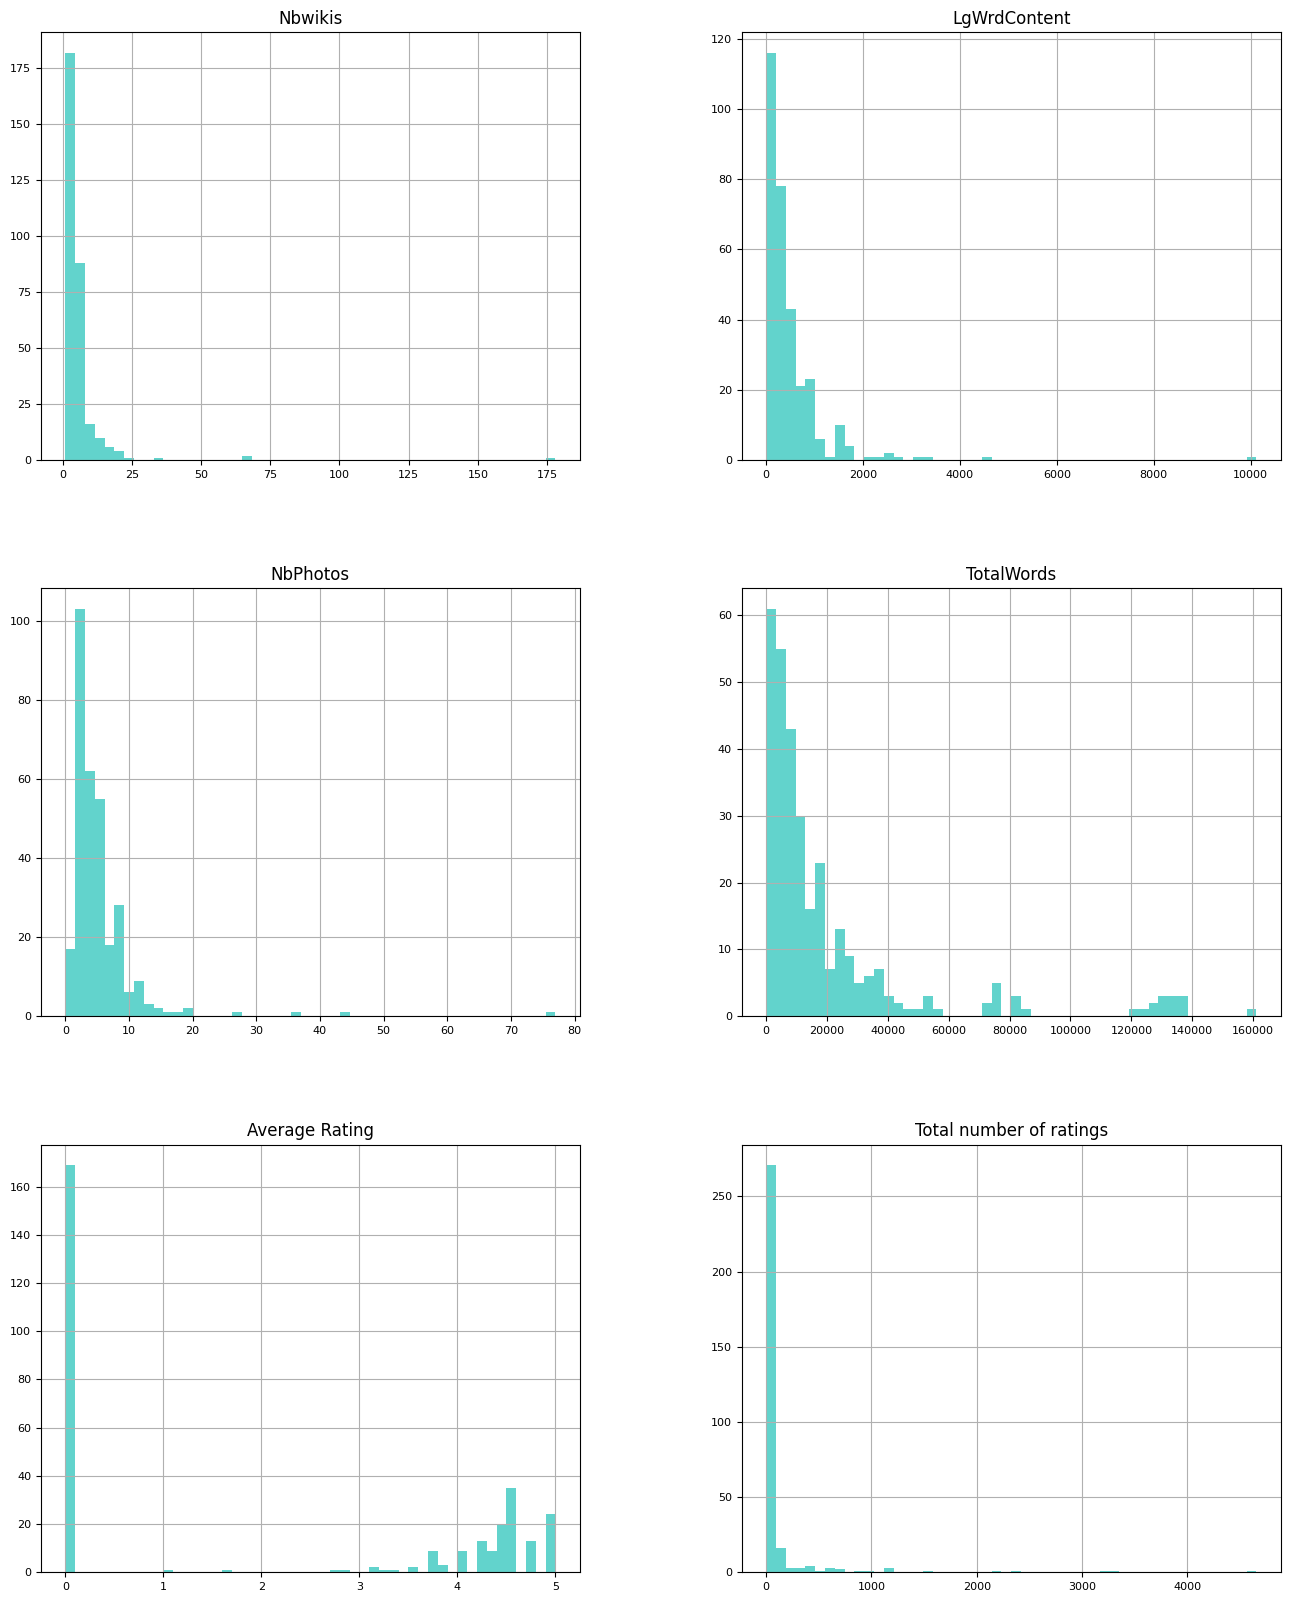

In [ ]:
#Check the distribution of the metric features with histogram plots

df_numerical_feature.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color=smoov_color);

In [ ]:
df_categorical_features = data[categorical_feature]

|   UNESCO |   count |
|---------:|--------:|
|        0 |     263 |
|        1 |      51 |


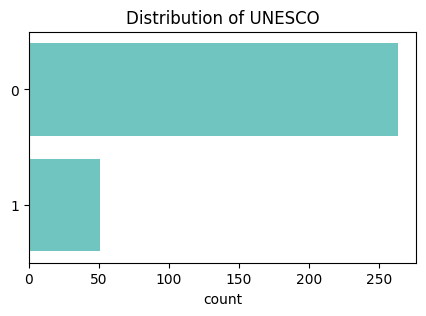

---------------------------------------------------------------------------------------------
|   heritage |   count |
|-----------:|--------:|
|          0 |     213 |
|          1 |     101 |


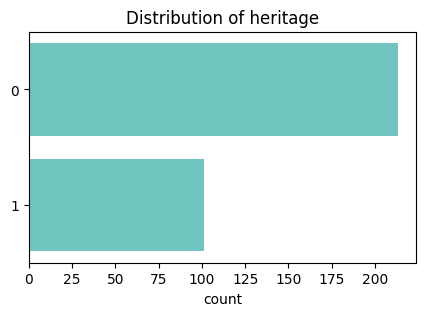

---------------------------------------------------------------------------------------------


In [ ]:
# Check the distribution of the categorical features with count plots
for col in df_categorical_features:
    print(df_categorical_features[col].value_counts().to_markdown())
    plt.figure(figsize=(5,3))
    plt.title('Distribution of {}'.format(col))
    sns.countplot(y = col, data = df_categorical_features, color=smoov_color)
    plt.ylabel('')0
    plt.show()
    print('---------------------------------------------------------------------------------------------')

## 3.4. Coherence check <a class="anchor" id="3.4"></a>

**Checking duplicated rows**

In [ ]:
# Find out if there are any duplicated rows in the data
duplicates= data.duplicated().sum()
if duplicates > 0:
    print('There are', duplicates, 'duplicated data in the data')
else:
    print('There are no duplicated data in the data')

There are no duplicated data in the data


## 3.5. Outliers Check <a class="anchor" id="3.5"></a>

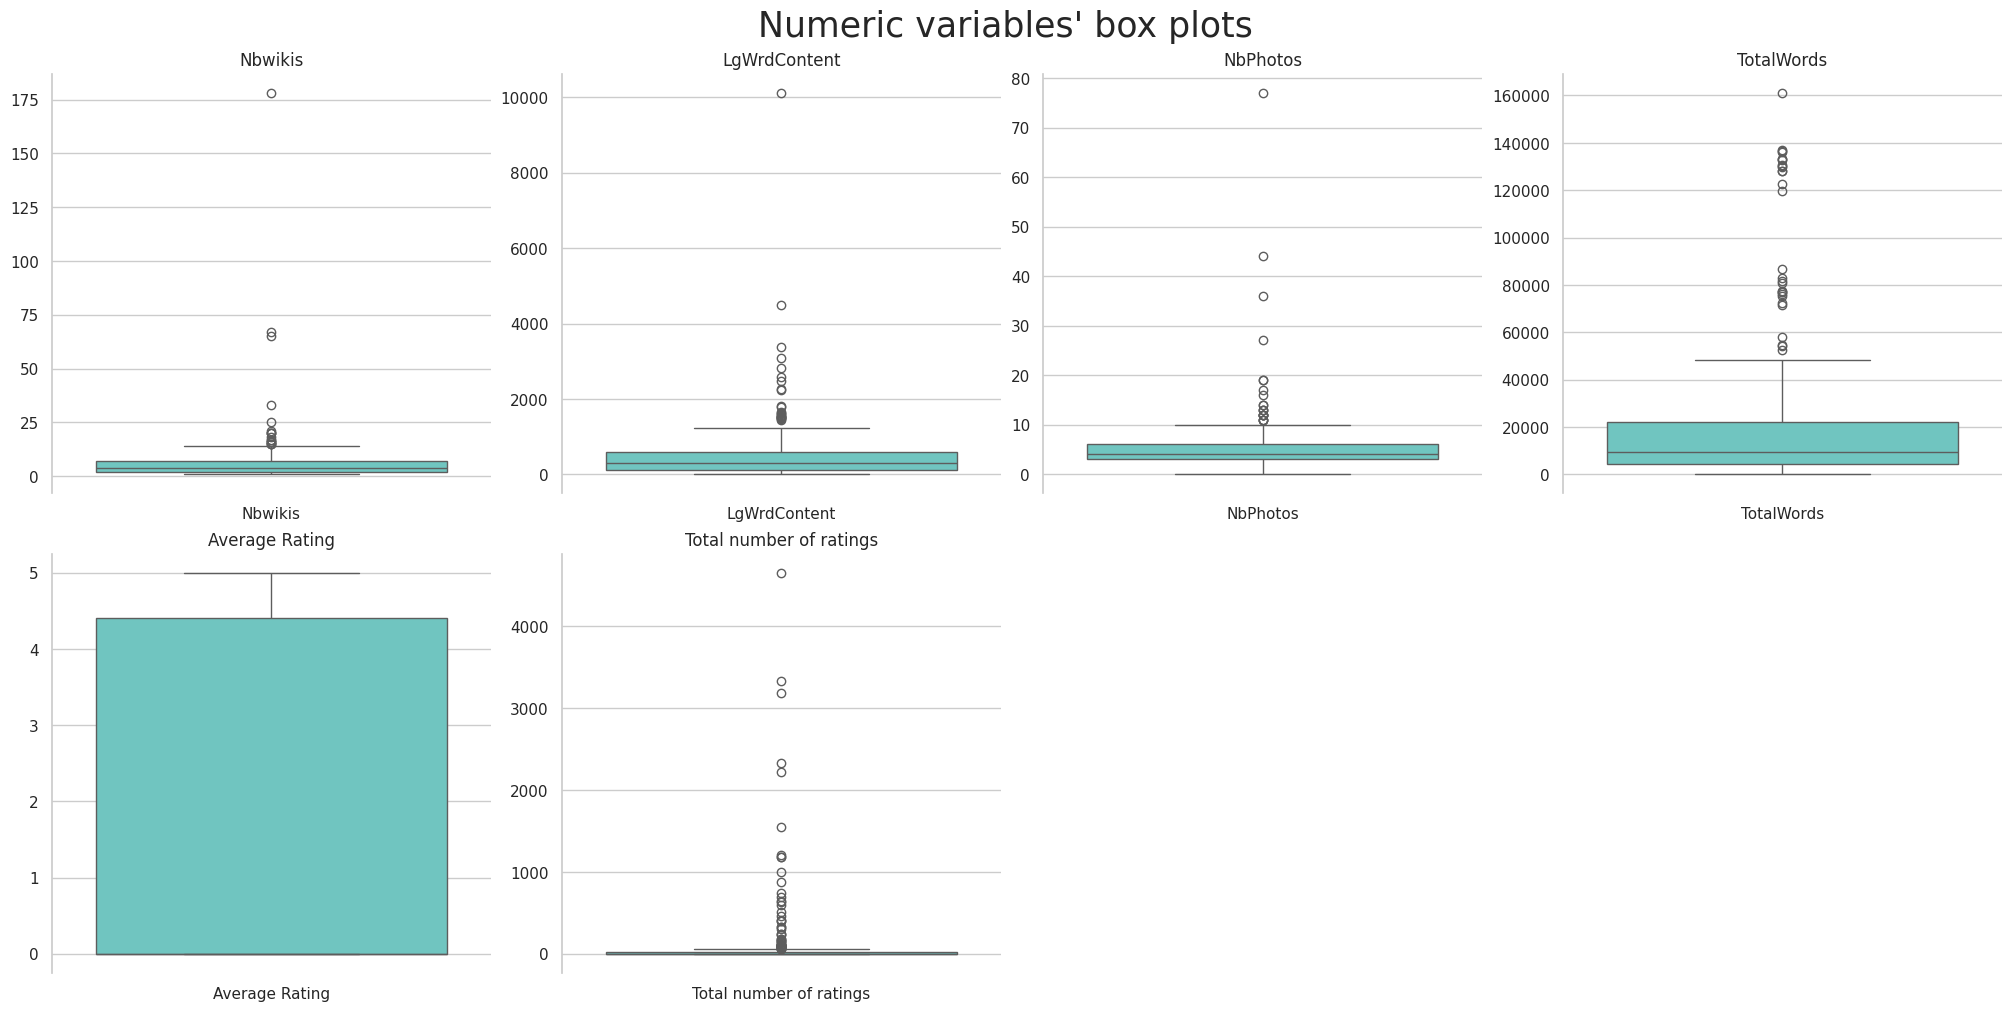

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Melt the DataFrame for plotting
data1 = pd.melt(df_numerical_feature, var_name='variable', value_name='value')

# List of numerical features
numerical_feature = df_numerical_feature.columns.tolist()

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_feature)
num_cols = 4
num_rows = (num_plots - 1) // num_cols + 1

# Prepare figure layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows), constrained_layout=True)

# Draw the box plots
for i, ax in enumerate(axes.flatten()):
    if i < num_plots:
        sns.boxplot(x="variable", y="value", data=data1[data1["variable"] == numerical_feature[i]], ax=ax, color=smoov_color)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_title(numerical_feature[i])

# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Finalize the plot
plt.suptitle("Numeric variables' box plots", fontsize=25)
sns.despine(bottom=True)

plt.show()


In [ ]:
from math import ceil
def plot_multiple_histograms(data, feats, title="Numeric Variables' Histograms", color=smoov_color):
    fig, axes = plt.subplots(math.ceil(len(feats) / 3), 3, figsize=(18, 12))
    for ax, feat in zip(axes.flatten(), feats):
        ax.hist(data[feat], bins=20, alpha=0.7, color=color, edgecolor='black')
        ax.set_title(feat, fontsize=14)
        ax.set_xlabel('Values', fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.tick_params(axis='both', which='major', labelsize=10)
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def plot_multiple_boxplots(data, feats, title="Numeric Variables' Box Plots", color=smoov_color):
    fig, axes = plt.subplots(math.ceil(len(feats) / 3), 3, figsize=(18, 12))
    for ax, feat in zip(axes.flatten(), feats):
        sns.boxplot(x=data[feat], ax=ax, orient="v", width=0.5, color=color)
        ax.set_title(feat, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

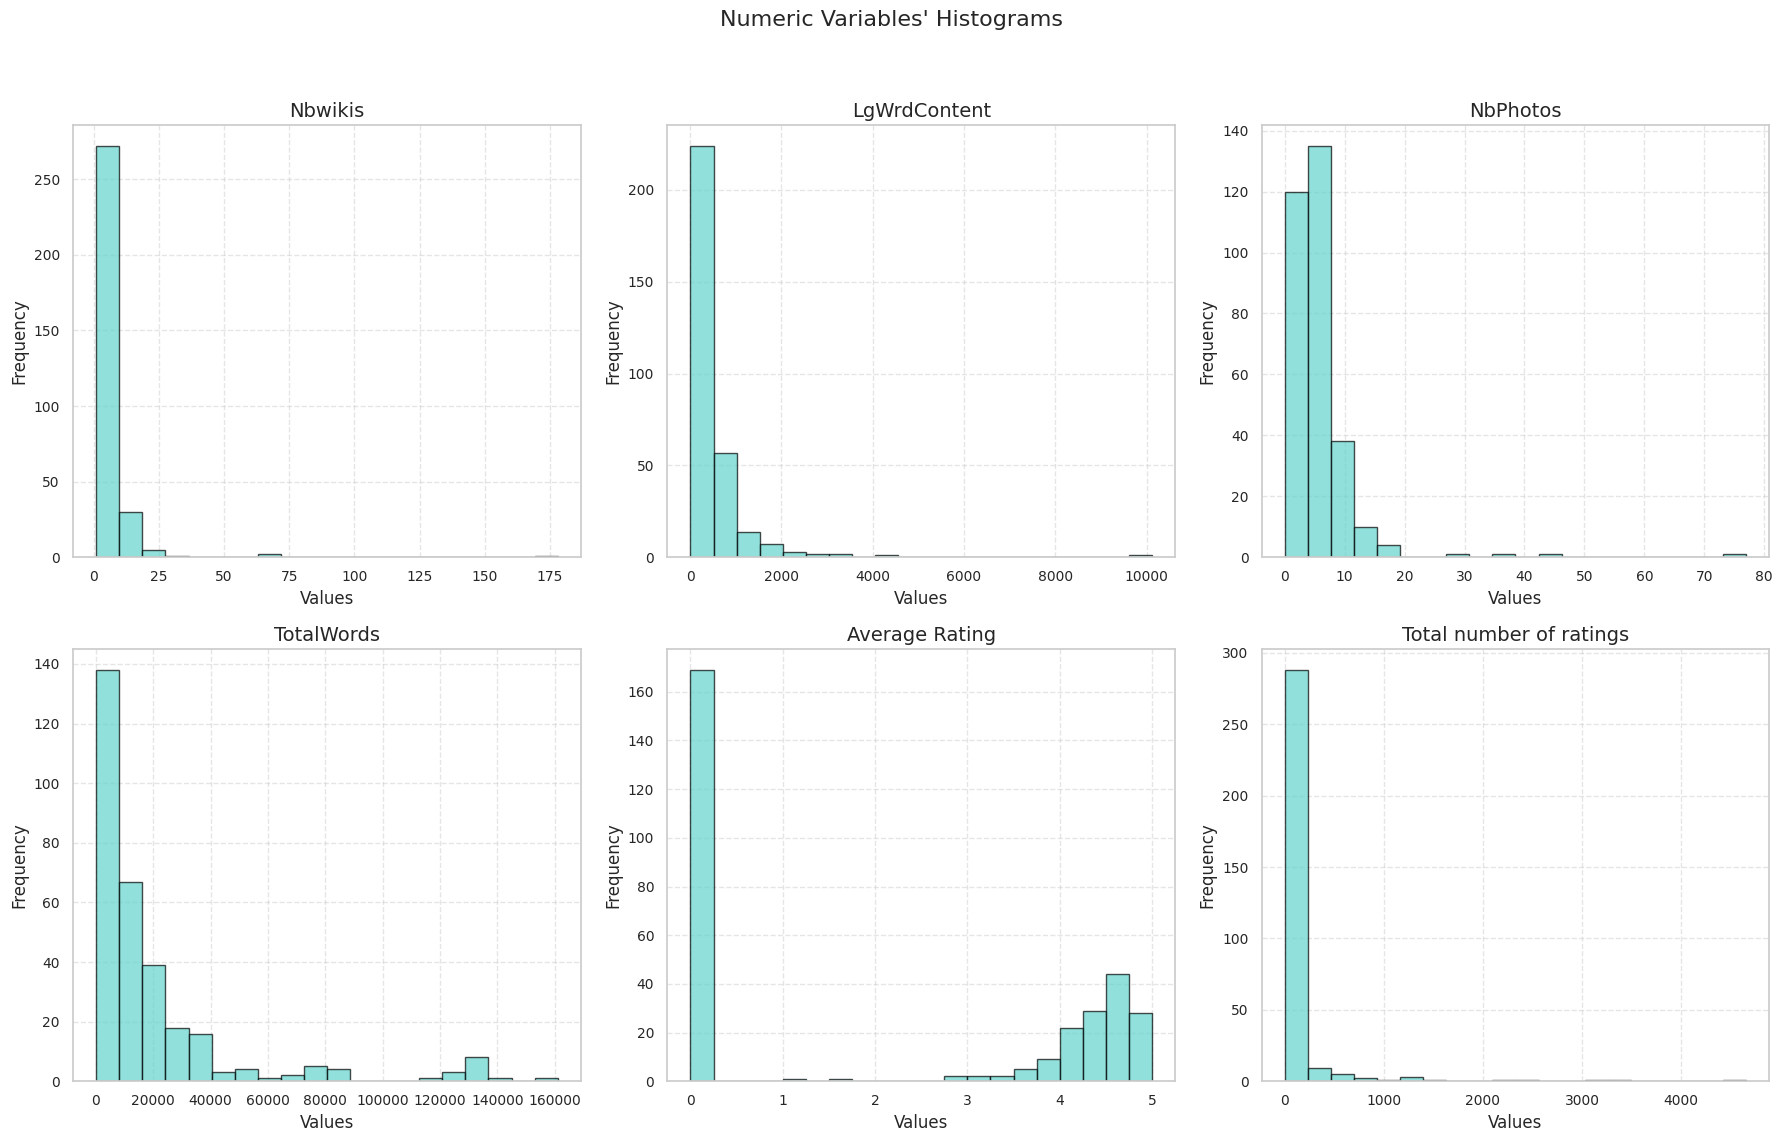

In [ ]:
plot_multiple_histograms(data, numerical_feature, title="Numeric Variables' Histograms")

**We can easily notice that we have several outliers in one dimension
representation using the box plot
and in the 2 dimensions using the Pairwise Relationship of Numerical Variables.**


<a class="anchor" id="forth-bullet">     

# 4. Data Preprocessing

In [ ]:
data.set_index("wikicode", inplace=True)


In [ ]:
data.head()

,placeLabel,heritage,longitude,latitude,UNESCO,Nbwikis,LgWrdContent,NbPhotos,TotalWords,Average Rating,Total number of ratings
wikicode,,,,,,,,,,,
Q28057078,Madaure,0,7.902356,36.077830,0,NaN,NaN,NaN,NaN,4.5,20
Q11936307,Madaure,0,7.902356,36.077830,0,10.0,176.0,2.0,6977.0,4.5,20
Q3110159,Golf Flamingo,0,10.800041,35.745504,0,3.0,61.0,3.0,35070.0,4.0,102
Q3301813,MausolÃ©e Sidi Abid el Ghariani,1,10.101600,35.675100,1,3.0,58.0,3.0,18574.0,4.5,21
Q60574005,Borj Ennar,0,10.764337,34.735462,0,5.0,61.0,9.0,13247.0,4.1,9


##  4.5. Feature Selection  <a class="anchor" id="4.5"></a>

###Numerical features

In [ ]:
numerical_feature = ["Nbwikis","LgWrdContent","NbPhotos","TotalWords","Average Rating","Total number of ratings","UNESCO","heritage"]


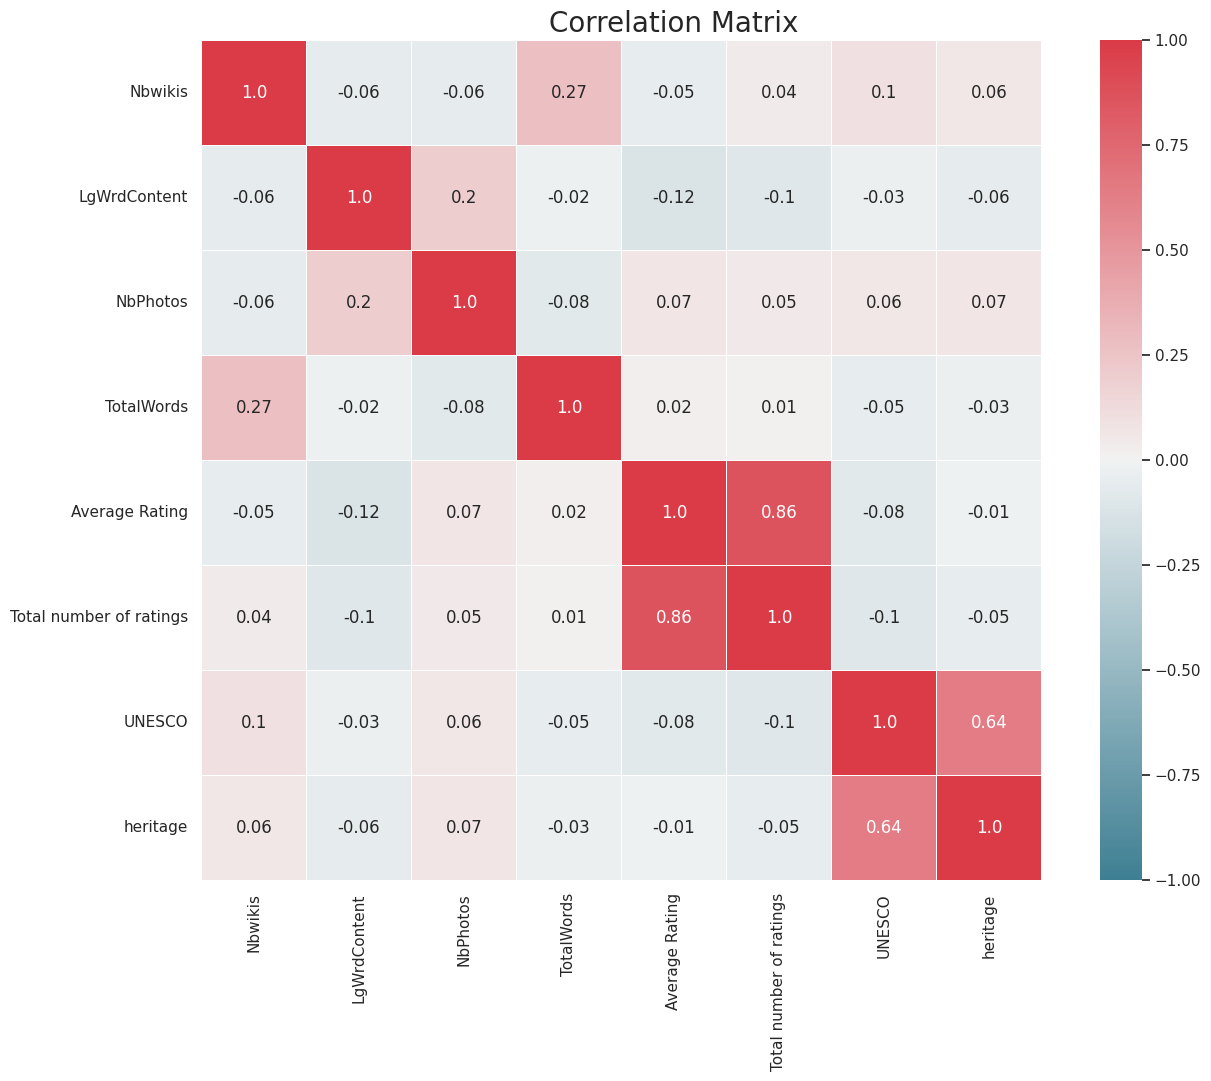

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(15, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[numerical_feature].corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.6| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

<a class="anchor" id="forth-bullet">     

# 5. Modelling

### Number of clusters

####Elbow Method

In [ ]:
data.head()

,placeLabel,heritage,longitude,latitude,UNESCO,Nbwikis,LgWrdContent,NbPhotos,TotalWords,Average Rating,Total number of ratings
wikicode,,,,,,,,,,,
Q28057078,Madaure,0,7.902356,36.077830,0,NaN,NaN,NaN,NaN,4.5,20
Q11936307,Madaure,0,7.902356,36.077830,0,10.0,176.0,2.0,6977.0,4.5,20
Q3110159,Golf Flamingo,0,10.800041,35.745504,0,3.0,61.0,3.0,35070.0,4.0,102
Q3301813,MausolÃ©e Sidi Abid el Ghariani,1,10.101600,35.675100,1,3.0,58.0,3.0,18574.0,4.5,21
Q60574005,Borj Ennar,0,10.764337,34.735462,0,5.0,61.0,9.0,13247.0,4.1,9


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
clustering_features_new = ['Nbwikis', 'LgWrdContent', 'NbPhotos', 'TotalWords', 'Average Rating', 'Total number of ratings', 'heritage', 'UNESCO']
data_clustering = data[clustering_features_new].fillna(0)  # Handle missing values
# Scale the features
scaler = MinMaxScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)
data_clustering_scaled = pd.DataFrame(data_clustering_scaled, columns=clustering_features_new)
data_clustering_scaled.index = data.index

In [ ]:
data_clustering_scaled.head()

,Nbwikis,LgWrdContent,NbPhotos,TotalWords,Average Rating,Total number of ratings,heritage,UNESCO
wikicode,,,,,,,,
Q28057078,0.000000,0.000000,0.000000,0.000000,0.90,0.004295,0.0,0.0
Q11936307,0.056180,0.017398,0.025974,0.043328,0.90,0.004295,0.0,0.0
Q3110159,0.016854,0.006030,0.038961,0.217787,0.80,0.021903,0.0,0.0
Q3301813,0.016854,0.005733,0.038961,0.115346,0.90,0.004509,1.0,1.0
Q60574005,0.028090,0.006030,0.116883,0.082265,0.82,0.001933,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

#Elbow Method
ks = range(1, 10)
inertias=[]
for k in ks:
	#Create a KMeans instance with k clusters: model
	model = KMeans(n_clusters = k)

	#Fit model to samples
	model.fit(data_clustering_scaled) #name given to the dataset

	#Append the inertia to the list of inertias

	inertias.append(model.inertia_)

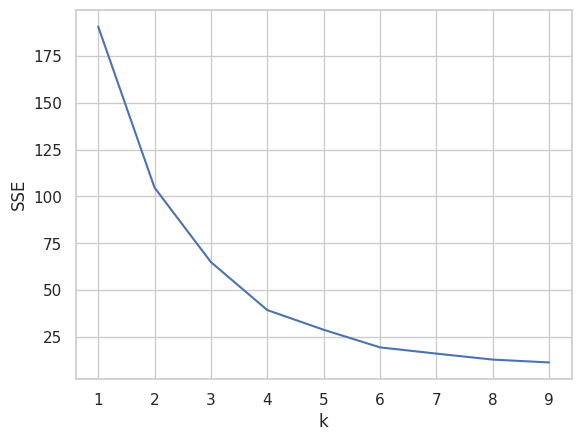

In [ ]:
plt.plot(ks, inertias) #x axis – ks; y axis – inertias
plt.xlabel("k")
plt.ylabel("SSE")
plt.xticks(ks) #define the ticks in x axis using the values of ks
plt.show()

**With the elbow method we can suspect 2 clusters or 3 so we decided to  do Hierarchical Clustering which Allows us to analyze the dendogram and select a suitable cutoff point.
And Calculate the silhoutte score to make sure we got the optimal number of clusters**

####Hierchichal clustring

In [ ]:
#Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

#try each one, evaluate the result and then comment the ones not chosen
hclustering = linkage(data_clustering_scaled, 'complete')     #maximum distance
hclustering = linkage(data_clustering_scaled, 'average')       #compute the distances between all points of the clusters and then perform the average
hclustering = linkage(data_clustering_scaled, 'single')       #minimum distance
hclustering = linkage(data_clustering_scaled, 'ward')     #join clusters based on reducing ESS (error sum of squares)


In [ ]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt.

    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"  #choose the one that gave the best result previously
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".

    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable

    sst = get_ss(df)  # get total sum of squares

    r2 = []  # where we will store the R2 metrics for each cluster solution

    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)

        # get cluster labels
        hclabels = cluster.fit_predict(df)

        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels', index=df.index)), axis=1)

        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)

        # remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels)
        r2.append(ssb / sst)  # save the R2 of the given cluster solution

    return np.array(r2)

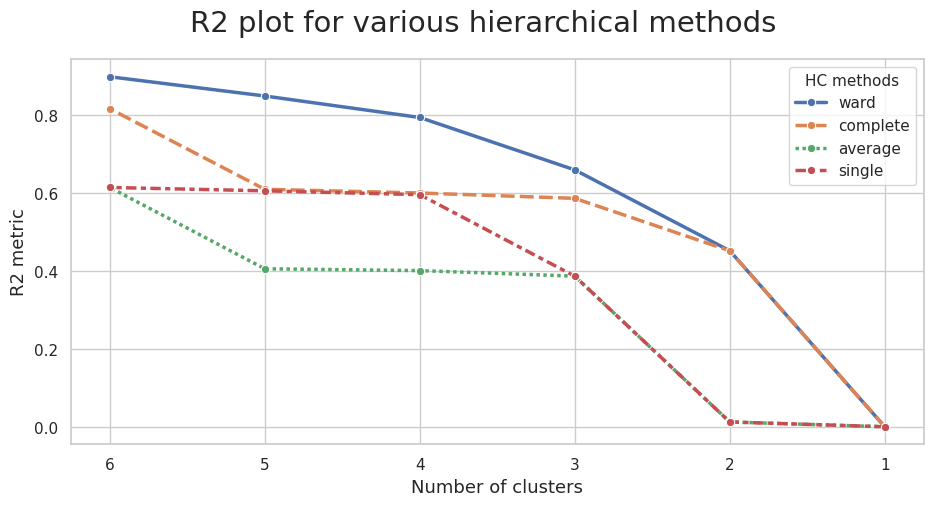

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Prepare input
hc_methods = ["ward", "complete", "average", "single"]

# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 6
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=data_clustering_scaled, link_method=link, max_nclus=max_nclus)
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

**2 or 3 clusters seems to be the optimal value for k**

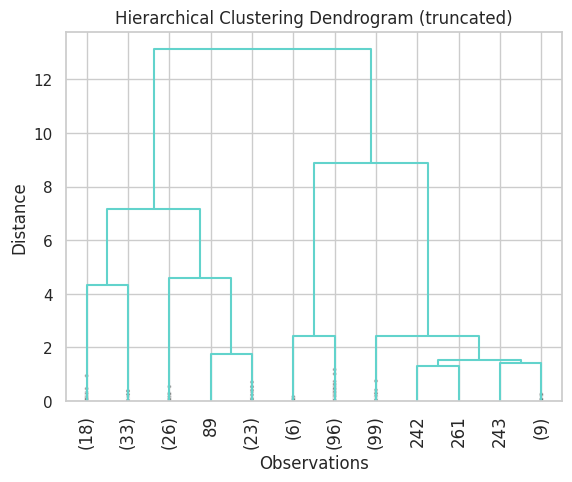

In [ ]:
def color_lightgreen(link):
    return smoov_color

# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    color_threshold=250,    # height (distance) at which the clusters are formed
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    link_color_func=color_lightgreen
)
plt.show()

**2 or 3 should be the optimal value for K according to hierchichal clustring**

####the silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

##setting range for possible values o k - 2 to 12
ks = range(2, 13)
sil_score = [] #Creating pretty list to store results in

for k in tqdm(ks):
#Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

#    # Fit model to samples
    model.fit_predict(data_clustering_scaled)

#    # Calculate Silhoutte Score
    sil_score.append(silhouette_score(data_clustering_scaled, model.labels_, metric='euclidean'))

  0%|          | 0/11 [00:00<?, ?it/s]

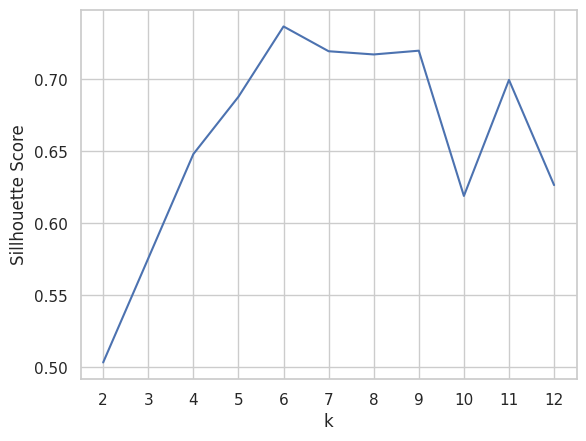

In [ ]:
## Plot ks (x-axis) vs sillouette_score (y-axis) using plt.plot().
plt.plot(ks, sil_score)

## define the label for x axis as 'k'
plt.xlabel('k')
## define the label for y axis as 'Silhouette Score'
plt.ylabel('Sillhouette Score')
## define the ticks in x axis using the values of ks
plt.xticks(ks)
## call plt.show()
plt.show()

**3 seems to be the ideal value for *k* but,Given that we have 3 techniques, we are going to determine k using a voting system.
elbow method returned that k shoould be equal to 2
hierchichal method: k=2
silhouette score: k=2**

###K-Means

In [ ]:
data_clustering.head()

,Nbwikis,LgWrdContent,NbPhotos,TotalWords,Average Rating,Total number of ratings,heritage,UNESCO
wikicode,,,,,,,,
Q28057078,0.0,0.0,0.0,0.0,4.5,20,0,0
Q11936307,10.0,176.0,2.0,6977.0,4.5,20,0,0
Q3110159,3.0,61.0,3.0,35070.0,4.0,102,0,0
Q3301813,3.0,58.0,3.0,18574.0,4.5,21,1,1
Q60574005,5.0,61.0,9.0,13247.0,4.1,9,0,0


In [ ]:
data_clustering_scaled.head()

,Nbwikis,LgWrdContent,NbPhotos,TotalWords,Average Rating,Total number of ratings,heritage,UNESCO
wikicode,,,,,,,,
Q28057078,0.000000,0.000000,0.000000,0.000000,0.90,0.004295,0.0,0.0
Q11936307,0.056180,0.017398,0.025974,0.043328,0.90,0.004295,0.0,0.0
Q3110159,0.016854,0.006030,0.038961,0.217787,0.80,0.021903,0.0,0.0
Q3301813,0.016854,0.005733,0.038961,0.115346,0.90,0.004509,1.0,1.0
Q60574005,0.028090,0.006030,0.116883,0.082265,0.82,0.001933,0.0,0.0


In [ ]:
model = KMeans(n_clusters = 3, random_state = 100)
km_labels=model.fit(data_clustering_scaled)
km_labels= model.predict(data_clustering_scaled) #predict
model .cluster_centers_
data_clustering_scaled['label'] = model.labels_

In [ ]:
data_clustering_scaled.head()

,Nbwikis,LgWrdContent,NbPhotos,TotalWords,Average Rating,Total number of ratings,heritage,UNESCO,label
wikicode,,,,,,,,,
Q28057078,0.000000,0.000000,0.000000,0.000000,0.90,0.004295,0.0,0.0,1
Q11936307,0.056180,0.017398,0.025974,0.043328,0.90,0.004295,0.0,0.0,1
Q3110159,0.016854,0.006030,0.038961,0.217787,0.80,0.021903,0.0,0.0,1
Q3301813,0.016854,0.005733,0.038961,0.115346,0.90,0.004509,1.0,1.0,0
Q60574005,0.028090,0.006030,0.116883,0.082265,0.82,0.001933,0.0,0.0,1


In [ ]:
data_original_reset = data.reset_index(drop=False)
data_clustering_scaled_reset = data_clustering_scaled.reset_index(drop=False)
data_original_with_label = data_original_reset.merge(data_clustering_scaled_reset[['wikicode', 'label']], on='wikicode', how='inner')

# Print the resulting DataFrame to check if the merge was successful
data_original_with_label.head()

,wikicode,placeLabel,heritage,longitude,latitude,UNESCO,Nbwikis,LgWrdContent,NbPhotos,TotalWords,Average Rating,Total number of ratings,label
0,Q28057078,Madaure,0,7.902356,36.077830,0,NaN,NaN,NaN,NaN,4.5,20,1
1,Q11936307,Madaure,0,7.902356,36.077830,0,10.0,176.0,2.0,6977.0,4.5,20,1
2,Q3110159,Golf Flamingo,0,10.800041,35.745504,0,3.0,61.0,3.0,35070.0,4.0,102,1
3,Q3301813,MausolÃ©e Sidi Abid el Ghariani,1,10.101600,35.675100,1,3.0,58.0,3.0,18574.0,4.5,21,0
4,Q60574005,Borj Ennar,0,10.764337,34.735462,0,5.0,61.0,9.0,13247.0,4.1,9,1


In [ ]:
data_original_with_label.set_index('wikicode', inplace=True)

In [ ]:
descr = data_original_with_label.groupby(['label']).describe().T
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
descr

label                                      0              1              2
heritage                count     101.000000     101.000000     112.000000
                        mean        1.000000       0.000000       0.000000
                        std         0.000000       0.000000       0.000000
                        min         1.000000       0.000000       0.000000
                        25%         1.000000       0.000000       0.000000
                        50%         1.000000       0.000000       0.000000
                        75%         1.000000       0.000000       0.000000
                        max         1.000000       0.000000       0.000000
longitude               count     101.000000     101.000000     112.000000
                        mean       10.261291      10.350881      10.601090
                        std         0.764001       1.142044       1.218221
                        min         8.133278       7.766667       7.766667
                        25%        10.164167       9.895583      10.130017
                        50%        10.171800      10.492067      10.455486
                        75%        10.626461      10.784000      10.872034
                        max        14.290556      13.182833      14.309220
latitude                count     101.000000     101.000000     112.000000
                        mean       35.752149      35.400465      34.943616
                        std         1.349738       1.471251       1.572783
                        min        32.639167      32.816817      32.632219
                        25%        35.240381      34.380500      33.487500
                        50%        36.500000      35.676944      34.738282
                        75%        36.798817      36.802300      36.690885
                        max        36.965298      37.526944      37.516700
UNESCO                  count     101.000000     101.000000     112.000000
                        mean        0.504950       0.000000       0.000000
                        std         0.502469       0.000000       0.000000
                        min         0.000000       0.000000       0.000000
                        25%         0.000000       0.000000       0.000000
                        50%         1.000000       0.000000       0.000000
                        75%         1.000000       0.000000       0.000000
                        max         1.000000       0.000000       0.000000
Nbwikis                 count     100.000000     100.000000     111.000000
                        mean        6.170000       5.320000       6.657658
                        std         9.228913       4.962241      16.956895
                        min         1.000000       1.000000       1.000000
                        25%         3.000000       2.000000       2.000000
                        50%         4.000000       3.500000       4.000000
                        75%         7.000000       7.000000       7.000000
                        max        67.000000      25.000000     178.000000
LgWrdContent            count     100.000000     100.000000     111.000000
                        mean      405.340000     414.530000     664.054054
                        std       495.445259     447.850387    1132.491949
                        min         7.000000      31.000000      24.000000
                        25%       115.500000      90.500000     143.500000
                        50%       277.000000     263.000000     391.000000
                        75%       470.500000     505.250000     774.500000
                        max      3074.000000    1776.000000   10116.000000
NbPhotos                count     100.000000     100.000000     111.000000
                        mean        5.800000       4.850000       5.396396
                        std         5.741925       2.882812       7.947875
                        min         1.000000       1.000000       0.000000
                        2